In [4]:
!pip install diffusers pillow SpeechRecognition


In [6]:
!pip install pyaudio


In [2]:
!apt-get install portaudio19-dev python-all-dev python3-all-dev && pip install pyaudio

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libportaudio2 libportaudiocpp0 libpython-all-dev libpython2-dev libpython2-stdlib libpython2.7
  libpython2.7-dev libpython2.7-minimal libpython2.7-stdlib libpython3-all-dev python-all python2
  python2-dev python2-minimal python2.7 python2.7-dev python2.7-minimal python3-all
Suggested packages:
  portaudio19-doc python2-doc python-tk python2.7-doc binfmt-support
The following NEW packages will be installed:
  libportaudio2 libportaudiocpp0 libpython-all-dev libpython2-dev libpython2-stdlib libpython2.7
  libpython2.7-dev libpython2.7-minimal libpython2.7-stdlib libpython3-all-dev portaudio19-dev
  python-all python-all-dev python2 python2-dev python2-minimal python2.7 python2.7-dev
  python2.7-minimal python3-all python3-all-dev
0 upgraded, 21 newly installed, 0 to remove and 49 not upgraded.
Need to get 8,166 kB of archives.
After thi

In [4]:
!pip install SpeechRecognition

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.8/32.8 MB 61.1 MB/s eta 0:00:00


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

You said: a bird with yellow Wing


  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

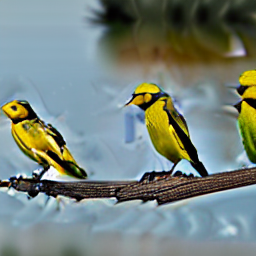

In [16]:
!pip install SpeechRecognition
from diffusers import StableDiffusionPipeline
import speech_recognition as sr

# Load the pipeline
pipe = StableDiffusionPipeline.from_pretrained("runwayml/stable-diffusion-v1-5")

def generate_image_from_speech():
  """Generates an image from a speech recording."""

  # Record audio (this should be done locally by the user)
  # ... (user records audio and saves it as "audio.wav")

  # Transcribe audio using SpeechRecognition
  recognizer = sr.Recognizer()
  with sr.AudioFile("/content/bird.wav") as source:
    audio_data = recognizer.record(source)
    try:
      prompt = recognizer.recognize_google(audio_data)
      print("You said:", prompt)
    except sr.UnknownValueError:
      print("Google Speech Recognition could not understand audio")
      return
    except sr.RequestError as e:
      print(f"Could not request results from Google Speech Recognition service; {e}")
      return

  # Generate image from the transcribed prompt
  image = pipe(prompt, num_inference_steps=20).images[0]
  image = pipe(prompt, height=256, width=256).images[0]
  image.show()
  display(image)

# Usage:
generate_image_from_speech()
